<a href="https://colab.research.google.com/github/khcir/Kunhee-Kim/blob/main/Data_C102_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pwd

'/content'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import itertools
from ipywidgets import interact, interactive
#import geopandas as gpd
import hashlib
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy.stats import pearsonr
import re

sns.set(style="dark")
plt.style.use("ggplot")
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# EDA
• Visualize at least two quantitative variables and two categorical variables. Your visualizations
must be relevant to your research questions!

• Describe any trends you observe, and any relationships you may want to follow up on.

• Describe any data cleaning steps you took. How will these decisions impact your models and
inferences?

• Explain how your visualizations should be relevant to your research questions: either by moti-
vating the question, or suggesting a potential answer. You must explain why they are relevant.

In [3]:
# from google.colab import files
# data_to_load = files.upload()

In [4]:
#make sure to run this cell first
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
copd = pd.read_csv("/content/drive/MyDrive/Data C102 final project/data/U.S._Chronic_Disease_Indicators__Chronic_Obstructive_Pulmonary_Disease.csv")
copd.head()
print(len(copd))
#if this cell doesn't run, "add shortcut to drive" will let you access this file (proj folder > right click > add shortcut)

142704


In [6]:
copd.isna().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Topic                             0
Question                          0
Response                     142704
DataValueUnit                 25870
DataValueType                     0
DataValue                     55058
DataValueAlt                  55058
DataValueFootnoteSymbol       85449
DatavalueFootnote             85449
LowConfidenceLimit            72123
HighConfidenceLimit           72123
StratificationCategory1           0
Stratification1                   0
StratificationCategory2      142704
Stratification2              142704
StratificationCategory3      142704
Stratification3              142704
ResponseID                   142704
LocationID                        0
TopicID                           0
QuestionID                        0
DataValueTypeID                   0
StratificationCategoryID1   

COPD Data Cleaning Steps

In [7]:
#dropped meaningless columns
na_columns = ["Response","StratificationCategory2","Stratification2","StratificationCategory3","Stratification3","ResponseID","StratificationCategoryID2","StratificationID2","StratificationCategoryID3","StratificationID3"]
copd = copd.drop(na_columns, axis=1)

I have dropped columns with NA values which does not impact my model and inferences because they are meaningless columns. 

In [8]:
copd.describe()

,YearStart,YearEnd,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,LocationID
count,142704.000000,142704.000000,8.764600e+04,8.764600e+04,70581.000000,70581.000000,142704.000000
mean,2014.961466,2014.961466,3.404611e+03,3.404611e+03,73.001714,87.850492,30.752649
std,2.736374,2.736374,4.515502e+04,4.515502e+04,102.780736,110.380606,17.470737
min,2010.000000,2010.000000,0.000000e+00,0.000000e+00,0.210000,0.440000,1.000000
25%,2013.000000,2013.000000,2.908250e+01,2.908250e+01,13.880000,20.530000,17.000000
50%,2015.000000,2015.000000,6.050000e+01,6.050000e+01,42.600000,59.900000,30.000000
75%,2017.000000,2017.000000,1.710000e+02,1.710000e+02,78.990000,91.850000,44.250000
max,2020.000000,2020.000000,2.925456e+06,2.925456e+06,1550.750000,1626.660000,78.000000


In [9]:
copd['Question'].unique()

array(['Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years',
       'Hospitalization for chronic obstructive pulmonary disease as any diagnosis among Medicare-eligible persons aged >= 65 years',
       'Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years',
       'Emergency department visit rate for chronic obstructive pulmonary disease as any diagnosis',
       'Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis among Medicare-eligible persons aged >= 65 years',
       'Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis',
       'Hospitalization for chronic obstructive pulmonary disease as any diagnosis',
       'Emergency department visit rate for chronic obstructive pulmonary disease as first-listed diagnosis',
       'Prevalence of chronic obstructive pulmonary disease among adults >= 18',
       'Pn

Since we are interested in the 'Prevalence of chronic obstructive pulmonary disease among adults >= 18'
filtered the dataframe that only contains this question.

In [10]:
copd_question = copd[copd['Question']=='Prevalence of chronic obstructive pulmonary disease among adults >= 18']
copd_question.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
79680,2016,2016,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Crude Prevalence,7.0,...,3.9,12.2,Race/Ethnicity,"Other, non-Hispanic",2,COPD,COPD2_0,CRDPREV,RACE,OTH
79704,2018,2018,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,5.1,...,3.9,6.8,Gender,Male,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENM
79714,2015,2015,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Crude Prevalence,4.9,...,2.8,8.7,Race/Ethnicity,"Other, non-Hispanic",2,COPD,COPD2_0,CRDPREV,RACE,OTH
79723,2012,2012,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,6.0,...,4.8,7.4,Gender,Female,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENF
79734,2011,2011,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,6.8,...,5.2,8.9,Gender,Male,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENM


In [11]:
copd_question.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DataValueFootnoteSymbol', 'DatavalueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1'],
      dtype='object')

In [12]:
select_columns = ['YearEnd',"LocationAbbr",'DataValue','Stratification1']
selected_copd_question = copd_question[select_columns]
selected_copd_question.head()


,YearEnd,LocationAbbr,DataValue,Stratification1
79680,2016,AK,7.0,"Other, non-Hispanic"
79704,2018,AK,5.1,Male
79714,2015,AK,4.9,"Other, non-Hispanic"
79723,2012,AK,6.0,Female
79734,2011,AK,6.8,Male


By observing the columns, our dataframe ended up with ['YearEnd',"LocationAbbr",'DataValue','Stratification1'] these columns since our model is interested whether the air quality affects the prevalance of chronic obstructive pulmonary disease.

## Data Visualization 1: Does smoking affects prevalance of COPD?

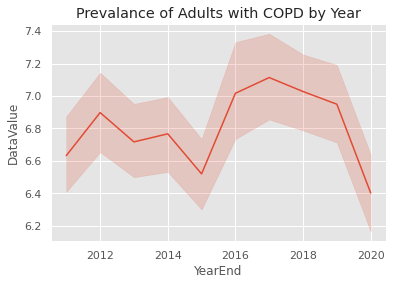

In [13]:
sns.lineplot(data = selected_copd_question, x= "YearEnd", y = "DataValue").set(title = "Prevalance of Adults with COPD by Year");

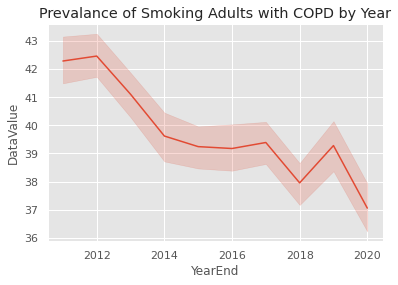

In [14]:
smoking_copd = copd[copd['Question']=='Prevalence of current smoking among adults >= 18 with diagnosed chronic obstructive pulmonary disease']
sns.lineplot(data = smoking_copd, x= "YearEnd", y = "DataValue").set(title = "Prevalance of Smoking Adults with COPD by Year");

#### Explanation: 
It seems like both of the line plots are showing that the prevalance is gradyally decreasing over several years. Suprising fact is that while the lowest average prevalance value is around 6.4% in 2020, the value for the smoking adults was 37% around 2020. This implies that smoking is a significant factor that causes COPD among adults. 

I could use this implication to use smoking as a confounding factor for research question 1 since smoking both affects the prevalance of COPD among adults and the air quality. Also, it can act as our predictor for research question 2 since the smoking variable significantly affects the prevalance of COPD proven by the visualization.

## Data visualization 2: visualize how prevalance differs by race and gender (do they work as a predictor column for research question 2)

In [15]:
g_copd_question = copd_question[copd_question['StratificationCategory1']=="Gender"]
r_copd_question = copd_question[copd_question['StratificationCategory1']== "Race/Ethnicity"]
g_copd_question.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
79704,2018,2018,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,5.1,...,3.9,6.8,Gender,Male,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENM
79723,2012,2012,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,6.0,...,4.8,7.4,Gender,Female,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENF
79734,2011,2011,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,6.8,...,5.2,8.9,Gender,Male,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENM
79740,2016,2016,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,5.5,...,3.8,7.8,Gender,Male,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENM
79757,2014,2014,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,6.0,...,4.8,7.5,Gender,Female,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENF


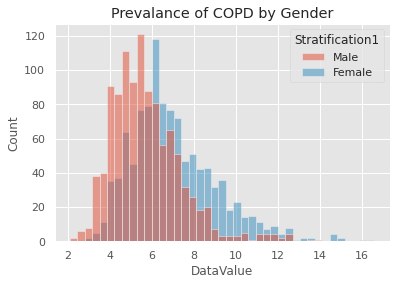

In [16]:
sns.histplot(data = g_copd_question, x= "DataValue", hue = "Stratification1").set(title = "Prevalance of COPD by Gender");

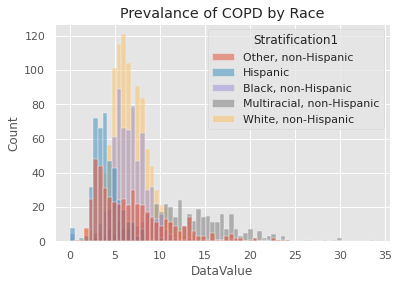

In [17]:
sns.histplot(data = r_copd_question, x= "DataValue", hue = "Stratification1").set(title = "Prevalance of COPD by Race");

#### Explanation :
It seems like distribution of male's prevalance is located on the left of distribution of female's prevalance which implies that the average of males' prevalance is lower than females'. We could assume that female might have more probability to get diagonsed to COPD.

When I look at the Prevalance by Race, it seems like distribution of hispanic has relatively low prevalance than black and white. Also it seems like the distribution of white and black follows the similar distribution. Multiracial, non-hispanic seems to have relatively high prevalance than other races. 

Since it seems like the distribution of prevalance rate differeces by both race and gender, I could assume that these can act as a predictor to predict for research question 2.

# Ozone_Concentration Data set

In [18]:
ozone = pd.read_csv("/content/drive/MyDrive/Data C102 final project/data/Daily_Census_Tract-Level_Ozone_Concentrations__2011-2014.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
#ozone = pd.read_csv("/content/drive/MyDrive/Data C102 final project/data/Daily_Census_Tract-Level_Ozone_Concentrations__2011-2014.csv", nrows = 5000000)

In [20]:
ozone.head()

,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_o3_pred,ds_o3_stdd
0,2011,22APR2011,53.0,53063.0,53063011800,47.66531,-117.22963,43.917166,4.850092
1,2011,22APR2011,53.0,53063.0,53063011900,47.66565,-117.25063,43.834730,4.806781
2,2011,22APR2011,53.0,53063.0,53063012000,47.66586,-117.27194,43.842599,5.034627
3,2011,22APR2011,53.0,53063.0,53063012100,47.66418,-117.29271,43.817001,4.892534
4,2011,22APR2011,53.0,53063.0,53063012200,47.67230,-117.32219,43.781775,4.941846


In [21]:
ozone['year'].unique()

array([2011, 2012, '2012', '  "error" : true',
       '  "message" : "Internal error"', '  "status" : 500', '}'],
      dtype=object)

## data cleaning: map statefips to statesabb

I have mapped states_codoes with state abbreviations to add column to both ozone and pm2.5 dataset in order to merge with COPD dataset. 

In [22]:
state_codes = {
    'WA': '53', 'DE': '10', 'DC': '11', 'WI': '55', 'WV': '54', 'HI': '15',
    'FL': '12', 'WY': '56', 'PR': '72', 'NJ': '34', 'NM': '35', 'TX': '48',
    'LA': '22', 'NC': '37', 'ND': '38', 'NE': '31', 'TN': '47', 'NY': '36',
    'PA': '42', 'AK': '02', 'NV': '32', 'NH': '33', 'VA': '51', 'CO': '08',
    'CA': '06', 'AL': '01', 'AR': '05', 'VT': '50', 'IL': '17', 'GA': '13',
    'IN': '18', 'IA': '19', 'MA': '25', 'AZ': '04', 'ID': '16', 'CT': '09',
    'ME': '23', 'MD': '24', 'OK': '40', 'OH': '39', 'UT': '49', 'MO': '29',
    'MN': '27', 'MI': '26', 'RI': '44', 'KS': '20', 'MT': '30', 'MS': '28',
    'SC': '45', 'KY': '21', 'OR': '41', 'SD': '46'
}
state_codes = dict(zip(state_codes.values(), state_codes.keys()))
state_codes = {int(k):v for k,v in state_codes.items()}
#state_codes

In [23]:
ozone['statefips'] = ozone['statefips'].fillna(0)
ozone['statefips'] = ozone['statefips'].astype('int')
ozone['stateAbbr'] = ozone['statefips'].map(state_codes)

ozone['countyfips'] = ozone['countyfips'].fillna(0)
ozone['countyfips'] = ozone['countyfips'].astype('int')
ozone.head()

,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_o3_pred,ds_o3_stdd,stateAbbr
0,2011,22APR2011,53,53063,53063011800,47.66531,-117.22963,43.917166,4.850092,WA
1,2011,22APR2011,53,53063,53063011900,47.66565,-117.25063,43.834730,4.806781,WA
2,2011,22APR2011,53,53063,53063012000,47.66586,-117.27194,43.842599,5.034627,WA
3,2011,22APR2011,53,53063,53063012100,47.66418,-117.29271,43.817001,4.892534,WA
4,2011,22APR2011,53,53063,53063012200,47.67230,-117.32219,43.781775,4.941846,WA


1. 5 states with the highest ozone concentration
2. 5 states with the lowest ozone concentration

3. plot a histogram for all ozone concentration

In [24]:
ozone_top_5 = ozone.groupby("stateAbbr")["ds_o3_pred"].mean().sort_values(ascending = False).head(5)
ozone_top_5

stateAbbr
CO    46.185508
OK    45.999943
AZ    45.970375
NM    45.697450
NV    45.057705
Name: ds_o3_pred, dtype: float64

In [25]:
ozone_bottom_5 = ozone.groupby("stateAbbr")["ds_o3_pred"].mean().sort_values().head(5)
ozone_bottom_5

stateAbbr
WA    28.442865
OR    30.474933
ME    32.442469
MN    33.214274
ND    33.896781
Name: ds_o3_pred, dtype: float64

Text(0.5, 1.0, 'Distribution of Ozone Concentration')

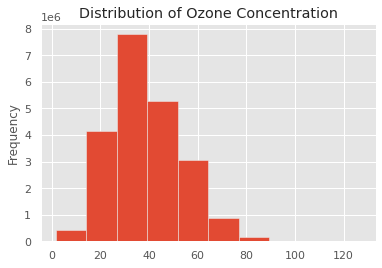

In [26]:
ozone['ds_o3_pred'].plot.hist()
plt.title("Distribution of Ozone Concentration")

It seems like the Ozone concentration distribution follows a unimodal normal distribution centered around 30-40.

## Data Visualization 3: Ozone concentration by countyfips

In [27]:
grouped_ozone = ozone.groupby('countyfips').mean()
grouped_ozone.head()

,statefips,latitude,longitude,ds_o3_pred,ds_o3_stdd
countyfips,,,,,
0,0.0,NaN,NaN,NaN,NaN
1001,1.0,32.490296,-86.521727,40.236364,5.637413
1003,1.0,30.556509,-87.755912,41.053630,5.263831
1005,1.0,31.865908,-85.330689,40.919092,6.076359
1007,1.0,33.042010,-87.139075,39.045128,5.334226


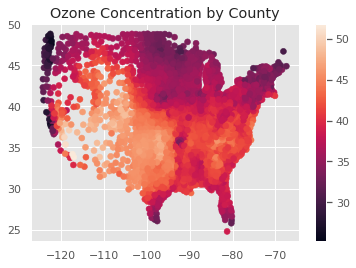

In [28]:
plt.scatter(x=grouped_ozone['longitude'], y=grouped_ozone['latitude'], c= grouped_ozone['ds_o3_pred'])
plt.title('Ozone Concentration by County')
plt.colorbar()
plt.show()

#### Explanation: 
The higher the ozone concentration the more pollution, which seems like Colorado (CO), New Mexico (NM), Utah (UT), Arizona (AZ), Nevada (NV) area has high ozone concentration. 

I have implemented this visualization to check what geographical area has low air quality since it relates to both research question 1 and 2. 

Geographical region can act as an instrumental variable since it affects the air quality but not directly affects the prevalance of COPD. I chould also check if the prevalance of COPD is also high in these areas using the COPD dataset.
Also it could act as a predictor for research question 2 by creating dummy variable of each state since we could find air quality differs by states.

# PM 2.5_Concentration Data set

In [29]:
#pmcon = pd.read_csv("/content/drive/MyDrive/Data C102 final project/data/Daily_Census_Tract-Level_PM2.5_Concentrations__2011-2014.csv")

In [30]:
#my notebook crashed while running first line; had to only take 5M rows
pmcon = pd.read_csv("/content/drive/MyDrive/Data C102 final project/data/Daily_Census_Tract-Level_PM2.5_Concentrations__2011-2014.csv", nrows = 5000000)

In [31]:
pmcon.head()

,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_pm_pred,ds_pm_stdd
0,2011,24MAY2011,44,44007,44007011600,41.91047,-71.45740,17.140095,2.291852
1,2011,24MAY2011,44,44007,44007011701,41.90844,-71.41556,17.198491,2.195946
2,2011,24MAY2011,44,44007,44007011702,41.89193,-71.42560,17.353419,2.153858
3,2011,24MAY2011,44,44007,44007011800,41.86903,-71.42897,17.618018,2.157761
4,2011,24MAY2011,44,44007,44007011901,41.86059,-71.44743,17.499644,2.182376


In [32]:
pmcon['statefips'] = pmcon['statefips'].fillna(0)
pmcon['statefips'] = pmcon['statefips'].astype('int')
pmcon['stateAbbr'] = pmcon['statefips'].map(state_codes)
pmcon.head()

,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_pm_pred,ds_pm_stdd,stateAbbr
0,2011,24MAY2011,44,44007,44007011600,41.91047,-71.45740,17.140095,2.291852,RI
1,2011,24MAY2011,44,44007,44007011701,41.90844,-71.41556,17.198491,2.195946,RI
2,2011,24MAY2011,44,44007,44007011702,41.89193,-71.42560,17.353419,2.153858,RI
3,2011,24MAY2011,44,44007,44007011800,41.86903,-71.42897,17.618018,2.157761,RI
4,2011,24MAY2011,44,44007,44007011901,41.86059,-71.44743,17.499644,2.182376,RI


1. 5 states with the highest PM 2.5 concentration
2. 5 states with the lowest PM 2.5 concentration

3. plot a histogram for all PM 2.5 concentration

In [33]:
pmcon_top_5 = pmcon.groupby("stateAbbr")["ds_pm_pred"].mean().sort_values(ascending = False).head(5)
pmcon_top_5

stateAbbr
DC    14.933828
GA    14.544801
MD    14.389360
OH    14.349259
KY    14.267913
Name: ds_pm_pred, dtype: float64

In [34]:
pmcon_bottom_5 = pmcon.groupby("stateAbbr")["ds_pm_pred"].mean().sort_values().head(5)
pmcon_bottom_5

stateAbbr
MT    5.623760
WA    6.065095
WY    6.117382
UT    6.139391
ID    6.448226
Name: ds_pm_pred, dtype: float64

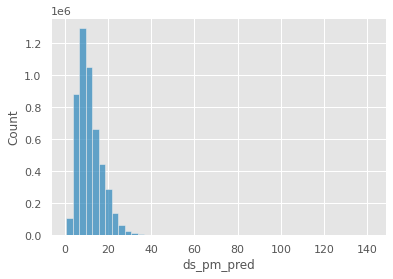

In [35]:
sns.histplot(data = pmcon, x ="ds_pm_pred", binwidth = 3);
#pmcon['ds_pm_pred'].plot.hist()

In [36]:
pmcon[pmcon['ds_pm_pred']>=40]['year'].value_counts()

2011    5034
Name: year, dtype: int64

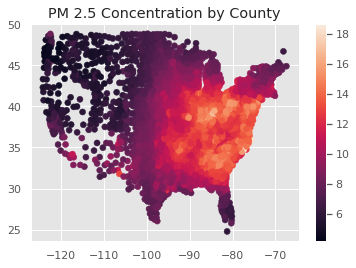

In [37]:
grouped_pmcon = pmcon.groupby('countyfips').mean()
plt.scatter(x=grouped_pmcon['longitude'], y=grouped_pmcon['latitude'], c= grouped_pmcon['ds_pm_pred'])
plt.title("PM 2.5 Concentration by County")
plt.colorbar()
plt.show()

It seems like year 2014 contains the most number of pm2.5 concentration that is higher than 40 while the data visualization doesn't consider these factors which is just averaging the value of PM 2.5 concentration for the entire year.

According to this visualization it shows that Illinois, Indiana area has high PM 2.5 concentration.

In [38]:
copd_question_ageadj = copd_question[copd_question['DataValueTypeID'] == 'AGEADJPREV']

In [39]:
#COPD Age Adjusted Prevalence Geomap 
state_prev = copd_question_ageadj[['LocationAbbr','DataValue']].groupby('LocationAbbr').mean().reset_index()

fig = go.Figure(data=go.Choropleth(
    locations=state_prev['LocationAbbr'], # Spatial coordinates
    z = state_prev['DataValue'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "Age Adjusted Prevalence %",
))
fig.update_layout(
    title_text = 'Age Adjusted Prevalence by State',
    geo_scope='usa', # limit map scope to USA
    margin={"r":0,"t":30,"l":0,"b":0}
)

fig.show()

In [40]:
#Pm2.5 geomap
pm_conc_states = pmcon[['stateAbbr','ds_pm_pred']].groupby('stateAbbr').mean().reset_index()

fig = go.Figure(data=go.Choropleth(
    locations= pm_conc_states['stateAbbr'], # Spatial coordinates
    z = pm_conc_states['ds_pm_pred'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "average PM2.5 concentration in μg/m3",
    
))
fig.update_layout(
    title_text = 'Mean estimated 24-hour average PM2.5 concentration in μg/m3 by States',
    geo_scope='usa', # limit map scope to USA
    margin={"r":0,"t":30,"l":0,"b":0}
)

fig.show()

In [41]:
#Ozone geomap
ozone_states = ozone[['stateAbbr','ds_o3_pred']].groupby('stateAbbr').mean().reset_index()

fig = go.Figure(data=go.Choropleth(
    locations= ozone_states['stateAbbr'], # Spatial coordinates
    z = ozone_states['ds_o3_pred'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "ozone ppb",
    
))
fig.update_layout(
    title_text = 'Mean estimated 8-hour ozone ppb by States',
    geo_scope='usa', # limit map scope to USA
    margin={"r":0,"t":30,"l":0,"b":0}
)

fig.show()

**Trend**

These color coded geomaps show how age adjusted prevalence rate of COPD, ozone concentration, and pm 2.5 concentration differs by states. By looking at geomaps of COPD prevalence rate and pm 2.5 concentration, we could observe that regions with high pm 2.5 concentration (Kentucky, West Virginia, etc) also tend to have high COPD prevalence rate. This indicates that there exists some relationship between pm 2.5 and COPD rate; we aim to define this relationship using causal inference technique. It was interesting to see that regions with higher ozone concentration (Nevada, Arizona, etc.) did not necessarily have higher COPD rate. 

**Data cleaning**

Since the granularity of COPD data is in each states, we grouped ozone & pm 2.5 table by states as well, by taking the mean. During the process, ozone & pm 2.5 data could have lost some information. For instance, while taking the mean, we could have accidentally included outliers. 

**Relevance**

This is relevant to our research question regarding the relationship between air pollutant and age adjusted prevalence rate of COPD. The visualization clearly shows that states with higher pm 2.5 have higher COPD rate. 


In [42]:
pmcon_year = pmcon[['stateAbbr','ds_pm_pred']].groupby('stateAbbr').mean().reset_index()
ozone_year = ozone[['stateAbbr','ds_o3_pred']].groupby('stateAbbr').mean().reset_index()
bad_air_state = ozone_year.merge(pmcon_year, how = 'inner', on = ['stateAbbr']).sort_values(by = ['ds_pm_pred', 'ds_o3_pred'], ascending = False).head(5)
good_air_state = ozone_year.merge(pmcon_year, how = 'inner', on = ['stateAbbr']).sort_values(by = ['ds_pm_pred', 'ds_o3_pred'], ascending = True).head(5)


In [43]:
bad_air_state

,stateAbbr,ds_o3_pred,ds_pm_pred
6,DC,38.843345,14.933828
9,GA,42.182160,14.544801
18,MD,39.580427,14.389360
33,OH,37.771817,14.349259
15,KY,40.360416,14.267913


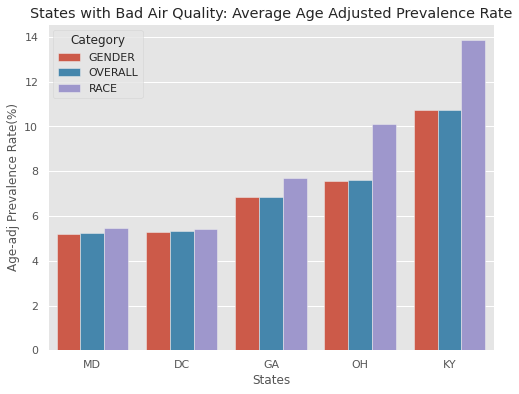

In [44]:
plt.figure(figsize=(8, 6))
copdStates = copd_question_ageadj[['LocationAbbr','DataValue','StratificationCategoryID1']].groupby(['LocationAbbr','StratificationCategoryID1']).mean().reset_index()
bad_air_copd = copdStates[copdStates['LocationAbbr'].isin(bad_air_state['stateAbbr'].to_list())]
good_air_copd = copdStates[copdStates['LocationAbbr'].isin(good_air_state['stateAbbr'].to_list())]
sns.barplot(x="States", y="Age-adj Prevalence Rate(%)", hue="Category", data= bad_air_copd.rename(columns = {'LocationAbbr': 'States', 'DataValue':'Age-adj Prevalence Rate(%)','StratificationCategoryID1':'Category'}).sort_values(by = 'Age-adj Prevalence Rate(%)'));
plt.title('States with Bad Air Quality: Average Age Adjusted Prevalence Rate');

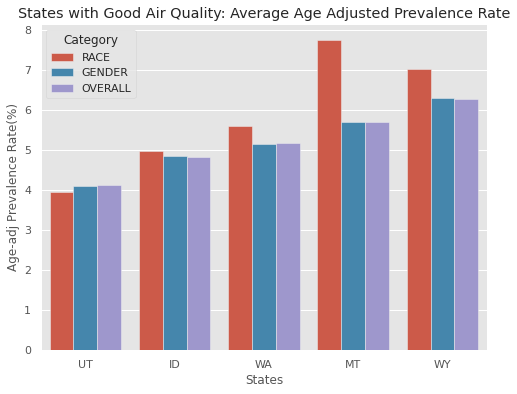

In [45]:
plt.figure(figsize=(8, 6))
sns.barplot(x="States", y="Age-adj Prevalence Rate(%)", hue="Category", data= good_air_copd.rename(columns = {'LocationAbbr': 'States', 'DataValue':'Age-adj Prevalence Rate(%)','StratificationCategoryID1':'Category'}).sort_values(by = 'Age-adj Prevalence Rate(%)'));
plt.title('States with Good Air Quality: Average Age Adjusted Prevalence Rate');

**Trend**

These two bar plots each compare age adjusted prevalence rate of COPD in states with good and bad air quality. We could observe that states with bad air quality have higher age adjusted prevalence rate of COPD compared to that of states with good air quality. For instance, COPD rate in states with bad air quality ranges from 6% to 14%, while that of in good air quality states ranges from 4% to 7.8%. 

**Data cleaning**

As stated in the research question, we defined bad air quality as ozone concentration greater than 80ppb and PM 2.5 concentration greater than 35.4μg/m3. However, since ozone & pm2.5 table for this visualization only contained 5M rows each, the data was not comprehensive enough to allow strict classification of good and bad air quality. Thus, we took the yearly average ozone/pm2.5 concentration by each state and defined five bad/good air quality states as those with highest/lowest ozone and pm2.5 concentration, respectively. 

**Relevance**

This is relevant to our research question regarding the relationship between air pollutant and age adjusted prevalence rate of COPD. The visualization clearly shows that states with bad air quality have higher COPD rate. 


https://www.census.gov/newsroom/releases/archives/2010_census/cb11-cn185.html

https://www.scientificamerican.com/article/past-racist-redlining-practices-increased-climate-burden-on-minority-neighborhoods/

https://en.wikipedia.org/wiki/List_of_U.S._states_by_non-Hispanic_white_population

https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_African-American_population

Will further examine 'climate burden on minority neighborhoods'

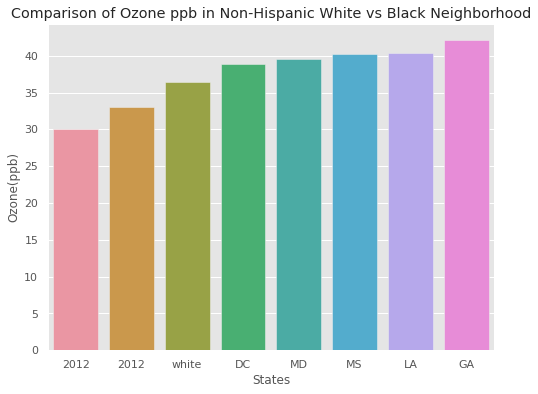

In [46]:
# minority = ['NY','FL','TX','GA','CA','NC','IL','MD','VA','OH']
minority = ['VI','DC','MS','LA','GA','MD']
# white = ['ME','VT','WV','NH','ND','IA','MT','KY','WY','SD']
white = ['ME','VT','WV','NH','ND']

minority_ozone = ozone[ozone['stateAbbr'].isin(minority)][['stateAbbr','ds_o3_pred']].groupby('stateAbbr').mean().reset_index()
white_ozone = ozone[ozone['stateAbbr'].isin(white)][['year','ds_o3_pred']].groupby('year').mean().reset_index().rename(columns = {'year':'stateAbbr'})
white_ozone['stateAbbr'] = white_ozone['stateAbbr'].replace({2011:'white'})
white_ozone = white_ozone[['stateAbbr','ds_o3_pred']].groupby('stateAbbr').mean().reset_index()
ozone_neigh = pd.concat([minority_ozone, white_ozone])

#bar plot comparing white and black neighborhoods
plt.figure(figsize=(8, 6))
sns.barplot(x="States", y="Ozone(ppb)", data=ozone_neigh.rename(columns = {'stateAbbr':'States','ds_o3_pred':'Ozone(ppb)'}).sort_values(by = 'Ozone(ppb)'));
plt.title('Comparison of Ozone ppb in Non-Hispanic White vs Black Neighborhood');

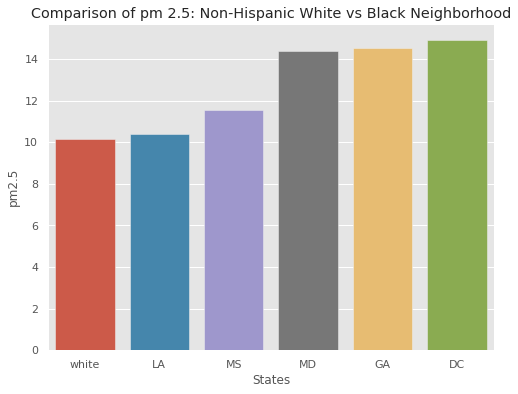

In [47]:
minority_pmcon = pmcon[pmcon['stateAbbr'].isin(minority)][['stateAbbr','ds_pm_pred']].groupby('stateAbbr').mean().reset_index()
white_pmcon = pmcon[pmcon['stateAbbr'].isin(white)][['year','ds_pm_pred']].groupby('year').mean().reset_index().rename(columns = {'year':'stateAbbr'})
white_pmcon['stateAbbr'] = white_pmcon['stateAbbr'].replace({2011:'white'})
white_pmcon = white_pmcon[['stateAbbr','ds_pm_pred']].groupby('stateAbbr').mean().reset_index()
ozone_neigh = pd.concat([minority_pmcon, white_pmcon])

#bar plot comparing white and black neighborhoods
plt.figure(figsize=(8, 6))
sns.barplot(x="States", y="pm2.5", data=ozone_neigh.rename(columns = {'stateAbbr':'States','ds_pm_pred':'pm2.5'}).sort_values(by = 'pm2.5'));
plt.title('Comparison of pm 2.5: Non-Hispanic White vs Black Neighborhood');

**Trend**

These two bar plots each compare ozone ppb and pm2.5 concentration in non-hispanic white and Black neighborhoods (top five states with highest non-hispanic/black population, according to census data). Here, we could observe that both ozone ppb and pm2.5 concentration in white neighborhood are relatively lower than that of in Black neighborhood. This trend may suggest that the climate burden exists in minority neighborhood. This may also imply that since people of color are easily exposed to air pollutants, they are more susceptible to health consequences.

**Data cleaning**

Due to memory shortage, I only took 5 million rows for each ozone and pm 2.5 data. This may have affected data coverage thus harm credibility of the data, since it only contained a portion of 2011 data. 

**Relevance**

This is relevant to our research question regarding the relationship between geographical location, race, and COPD prevalence. Starting from here, we can further examine if most black populated states have a higher chance of getting diagnosed with COPD. From the visualization, we have identified how racial composition differs by states and how these states have different levels of air pollutant. 


In [48]:
age_data =pd.read_csv('/content/drive/MyDrive/Data C102 final project/data/nst-est2019-01.csv', skiprows=3)[5:55]

In [49]:
age_data.columns

Index(['Unnamed: 0', 'Census', 'Estimates Base', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [50]:
age_data = age_data.rename(columns={'Unnamed: 0':'State'})

In [51]:
age_data['State'] = age_data['State'].str.replace('.','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [52]:
age_data.head()

,State,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
5,Alabama,"4,779,736","4,780,125","4,785,437","4,799,069","4,815,588","4,830,081","4,841,799","4,852,347","4,863,525","4,874,486","4,887,681","4,903,185"
6,Alaska,"710,231","710,249","713,910","722,128","730,443","737,068","736,283","737,498","741,456","739,700","735,139","731,545"
7,Arizona,"6,392,017","6,392,288","6,407,172","6,472,643","6,554,978","6,632,764","6,730,413","6,829,676","6,941,072","7,044,008","7,158,024","7,278,717"
8,Arkansas,"2,915,918","2,916,031","2,921,964","2,940,667","2,952,164","2,959,400","2,967,392","2,978,048","2,989,918","3,001,345","3,009,733","3,017,804"
9,California,"37,253,956","37,254,519","37,319,502","37,638,369","37,948,800","38,260,787","38,596,972","38,918,045","39,167,117","39,358,497","39,461,588","39,512,223"


In [53]:
state_ab = pd.read_csv('/content/drive/MyDrive/Data C102 final project/data/state_ab.csv')

In [54]:
state_ab.head()

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [55]:
age_data = age_data.merge(state_ab, how='inner', left_on='State', right_on='State').drop(columns=['Abbrev'])
age_data['Census'] = age_data['Census'].str.replace(',', '').astype(int)

In [56]:
fig_age = go.Figure(data=go.Choropleth(
    locations= age_data['Code'], 
    z = age_data['Census'], 
    locationmode = 'USA-states', 
    colorscale = 'Viridis',
    colorbar_title = "census age",
    
))
fig.update_layout(
    title_text = 'Census age by States',
    geo_scope='usa',
    margin={"r":0,"t":30,"l":0,"b":0}
)

fig.show()

In [57]:
age_data.sort_values('Census', ascending=False)

,State,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Code
4,California,37253956,"37,254,519","37,319,502","37,638,369","37,948,800","38,260,787","38,596,972","38,918,045","39,167,117","39,358,497","39,461,588","39,512,223",CA
43,Texas,25145561,"25,146,091","25,241,971","25,645,629","26,084,481","26,480,266","26,964,333","27,470,056","27,914,410","28,295,273","28,628,666","28,995,881",TX
32,New York,19378102,"19,378,144","19,399,878","19,499,241","19,572,932","19,624,447","19,651,049","19,654,666","19,633,428","19,589,572","19,530,351","19,453,561",NY
9,Florida,18801310,"18,804,564","18,845,537","19,053,237","19,297,822","19,545,621","19,845,911","20,209,042","20,613,477","20,963,613","21,244,317","21,477,737",FL
13,Illinois,12830632,"12,831,572","12,840,503","12,867,454","12,882,510","12,895,129","12,884,493","12,858,913","12,820,527","12,778,828","12,723,071","12,671,821",IL
38,Pennsylvania,12702379,"12,702,868","12,711,160","12,745,815","12,767,118","12,776,309","12,788,313","12,784,826","12,782,275","12,787,641","12,800,922","12,801,989",PA
35,Ohio,11536504,"11,536,751","11,539,336","11,544,663","11,548,923","11,576,684","11,602,700","11,617,527","11,634,370","11,659,650","11,676,341","11,689,100",OH
22,Michigan,9883640,"9,884,116","9,877,510","9,882,412","9,897,145","9,913,065","9,929,848","9,931,715","9,950,571","9,973,114","9,984,072","9,986,857",MI
10,Georgia,9687653,"9,688,729","9,711,881","9,802,431","9,901,430","9,972,479","10,067,278","10,178,447","10,301,890","10,410,330","10,511,131","10,617,423",GA
33,North Carolina,9535483,"9,535,751","9,574,323","9,657,592","9,749,476","9,843,336","9,932,887","10,031,646","10,154,788","10,268,233","10,381,615","10,488,084",NC
